## Summary of Introduction to Deep Learning for Particle Physics

Using datasets of electromagnetic shower at CMS detector, CERN, we have classified electrons or photons from given data with ANN, CNN, and ResNet models. Starting from grasping the overview of dataset, we built and trained them on two datasets with different number of layers. 

Let's see our results once again and discuss the results!

## Outline
1. [ANN](#ANN)
2. [CNN](#CNN)
3. [ResNet](#ResNet)
4. [Conclusion](#Conclusion)
5. [Appendix](#Appendix)
    - [Overfitting and Underfitting](#Appendix1)
    - [Energy Loss of Particles](#Appendix2)
6. [Acknowledgments](#Acknowledgments)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [4]:
plt.rcParams.update({'font.family': 'cmr10',
                     'font.size': 12,
                     'axes.unicode_minus': False,
                     'axes.labelsize': 12,
                     'axes.labelsize': 12,
                     'figure.figsize': (4, 4),
                     'figure.dpi': 160,
                     'mathtext.fontset': 'cm',
                     'mathtext.rm': 'serif',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.top': True,
                     'ytick.right': True
                     })
plt.rcParams["axes.formatter.use_mathtext"] = True

In [13]:
# load the results
train_data_directory = '../EGamma/train_data/'

cnn_energy_outputs = {'train_loss': np.load(train_data_directory + 'cnn_energy_train_loss.npy'),
                  'train_acc': np.load(train_data_directory + 'cnn_energy_train_acc.npy'),
                  'val_best_auc': np.load(train_data_directory + 'cnn_energy_val_best_auc.npy'),
                  'val_loss': np.load(train_data_directory + 'cnn_energy_val_loss.npy'),
                  'val_acc': np.load(train_data_directory + 'cnn_energy_val_acc.npy'),
                  'val_fpr': np.load(train_data_directory + 'cnn_energy_fpr.npy'),
                  'val_tpr': np.load(train_data_directory + 'cnn_energy_tpr.npy'),
                  '4_layers_train_loss': np.load(train_data_directory + 'cnn_4_layers_energy_train_loss.npy'),
                  '4_layers_train_acc': np.load(train_data_directory + 'cnn_4_layers_energy_train_acc.npy'),
                  '4_layers_val_best_auc': np.load(train_data_directory + 'cnn_4_layers_energy_val_best_auc.npy'),
                  '4_layers_val_loss': np.load(train_data_directory + 'cnn_4_layers_energy_val_loss.npy'),
                  '4_layers_val_acc': np.load(train_data_directory + 'cnn_4_layers_energy_val_acc.npy'),
                  '4_layers_val_fpr': np.load(train_data_directory + 'cnn_4_layers_energy_fpr.npy'),
                  '4_layers_val_tpr': np.load(train_data_directory + 'cnn_4_layers_energy_tpr.npy')}

energy_outputs = {'train_loss': np.load(train_data_directory + 'energy_train_loss.npy'),
                  'train_acc': np.load(train_data_directory + 'energy_train_acc.npy'),
                  'val_best_auc': np.load(train_data_directory + 'energy_val_best_auc.npy'),
                  'val_loss': np.load(train_data_directory + 'energy_val_loss.npy'),
                  'val_acc': np.load(train_data_directory + 'energy_val_acc.npy'),
                  'val_fpr': np.load(train_data_directory + 'energy_fpr.npy'),
                  'val_tpr': np.load(train_data_directory + 'energy_tpr.npy'),
                  '12_layers_train_loss': np.load(train_data_directory + '12_layers_energy_train_loss.npy'),
                  '12_layers_train_acc': np.load(train_data_directory + '12_layers_energy_train_acc.npy'),
                  '12_layers_val_best_auc': np.load(train_data_directory + '12_layers_energy_val_best_auc.npy'),
                  '12_layers_val_loss': np.load(train_data_directory + '12_layers_energy_val_loss.npy'),
                  '12_layers_val_acc': np.load(train_data_directory + '12_layers_energy_val_acc.npy'),
                  '12_layers_val_fpr': np.load(train_data_directory + '12_layers_energy_fpr.npy'),
                  '12_layers_val_tpr': np.load(train_data_directory + '12_layers_energy_tpr.npy')}

feature_outputs = {'train_loss': np.load(train_data_directory + 'feature_train_loss.npy'),
                  'train_acc': np.load(train_data_directory + 'feature_train_acc.npy'),
                  'val_best_auc': np.load(train_data_directory + 'feature_val_best_auc.npy'),
                  'val_loss': np.load(train_data_directory + 'feature_val_loss.npy'),
                  'val_acc': np.load(train_data_directory + 'feature_val_acc.npy'),
                  'val_fpr': np.load(train_data_directory + 'feature_fpr.npy'),
                  'val_tpr': np.load(train_data_directory + 'feature_tpr.npy'),
                  '12_layers_train_loss': np.load(train_data_directory + '12_layers_feature_train_loss.npy'),
                  '12_layers_train_acc': np.load(train_data_directory + '12_layers_feature_train_acc.npy'),
                  '12_layers_val_best_auc': np.load(train_data_directory + '12_layers_feature_val_best_auc.npy'),
                  '12_layers_val_loss': np.load(train_data_directory + '12_layers_feature_val_loss.npy'),
                  '12_layers_val_acc': np.load(train_data_directory + '12_layers_feature_val_acc.npy'),
                  '12_layers_val_fpr': np.load(train_data_directory + '12_layers_feature_fpr.npy'),
                  '12_layers_val_tpr': np.load(train_data_directory + '12_layers_feature_tpr.npy')}

<a id="ANN"></a>

## ANN

We have conducted two experiments:
1. Which dataset is useful for the model to classify, shower features or energy deposits?
2. How does the number of layer affect on the model accuracy?

Let's make sure the results one by one!

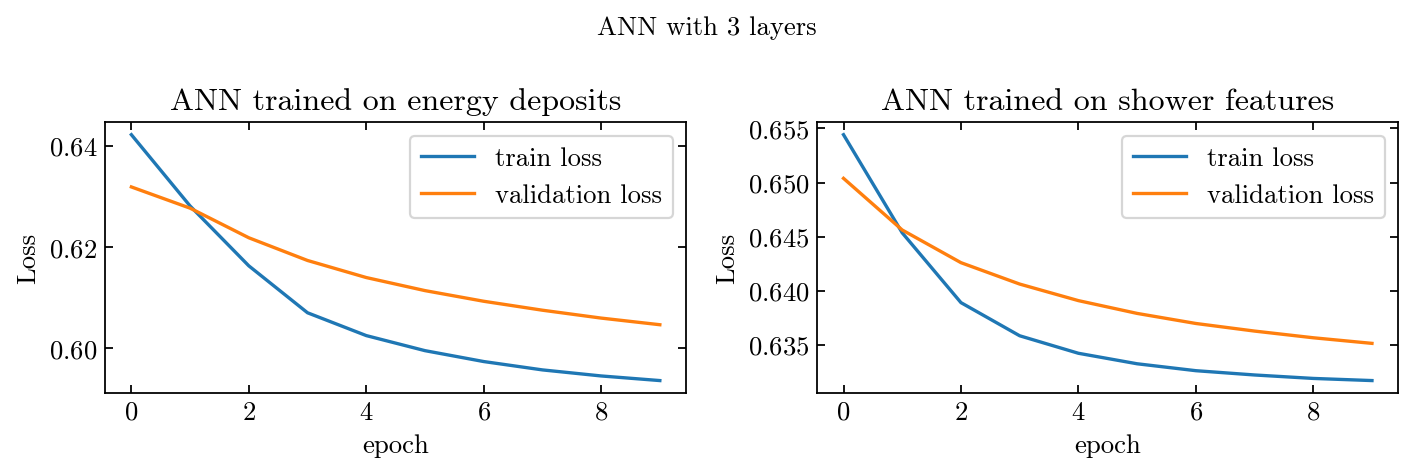

In [4]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(energy_outputs['train_loss'])), energy_outputs['train_loss'], label='train loss')
plt.plot(range(len(energy_outputs['val_loss'])), energy_outputs['val_loss'], label='validation loss')
plt.title('ANN trained on energy deposits')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
# plt.ylim(0.575, 0.655)

plt.subplot(1, 2, 2)
plt.plot(range(len(feature_outputs['train_loss'])), feature_outputs['train_loss'], label='train loss')
plt.plot(range(len(feature_outputs['val_loss'])), feature_outputs['val_loss'], label='validation loss')
plt.title('ANN trained on shower features')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')

plt.suptitle('ANN with 3 layers', fontsize=12)
plt.tight_layout()
plt.show()

The very first thing to check whenever you train a NN model is to check overfitting and underfitting.

Overfitting occurs when the model is trained too much detail of the given dataset, so you can observe it when the gap between train loss and validation loss increase suddenly. It sometimes happens (that's why we need to plot them!) due to how the data is preprocessed or parameters, and it performs poorly on test set.

Underfitting, on the other hand, happened when the model did not learn the complexity of the dataset, so the train loss and validation loss will have similar values and both have large values. 

Based on the two plots of loss, we observe that both train loss and validation loss decrease as the training proceeds. Additionally, the gap between train loss and validation is reasonable and we do not see weird spike. Therefore, these plots gave us an evidence that the ANN models was successfully trained.

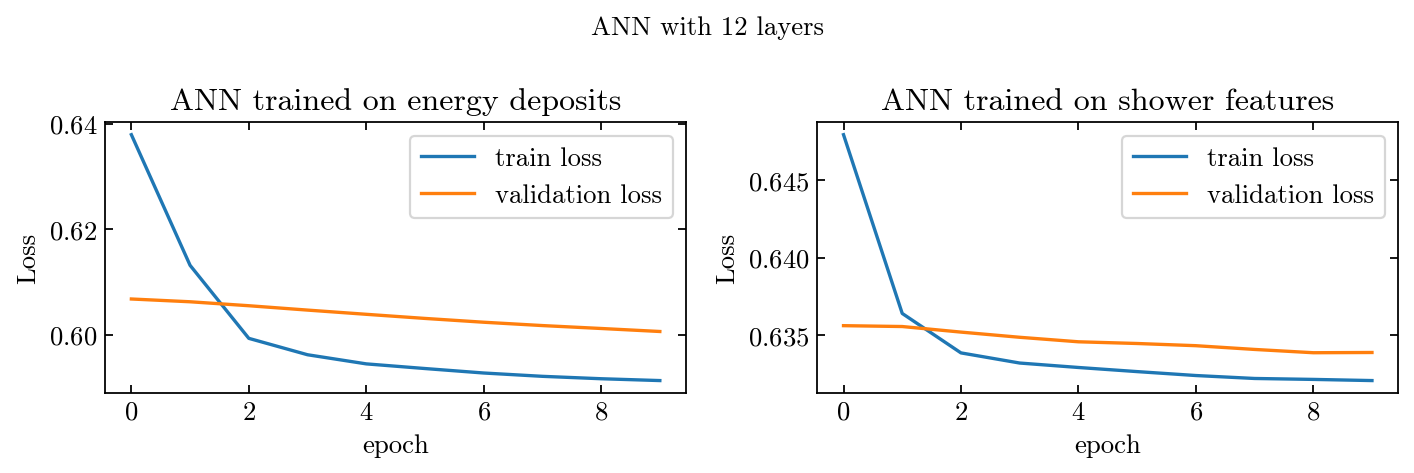

In [25]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(energy_outputs['12_layers_train_loss'])), energy_outputs['12_layers_train_loss'], label='train loss')
plt.plot(range(len(energy_outputs['12_layers_val_loss'])), energy_outputs['12_layers_val_loss'], label='validation loss')
plt.title('ANN trained on energy deposits')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
# plt.ylim(0.575, 0.655)

plt.subplot(1, 2, 2)
plt.plot(range(len(feature_outputs['12_layers_train_loss'])), feature_outputs['12_layers_train_loss'], label='train loss')
plt.plot(range(len(feature_outputs['12_layers_val_loss'])), feature_outputs['12_layers_val_loss'], label='validation loss')
plt.title('ANN trained on shower features')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')

plt.suptitle('ANN with 12 layers', fontsize=12)
plt.tight_layout()
plt.show()

Similarly, we also see that both train loss and validation loss decrease as the model is trained. Thus, the deeper ANN models were trained well. 

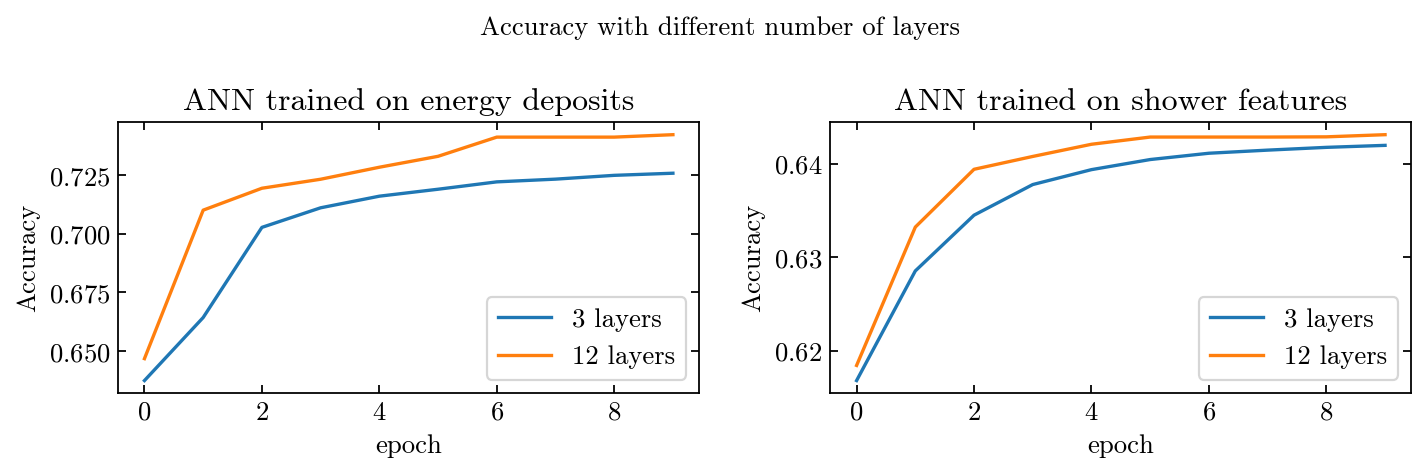

In [26]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(energy_outputs['val_best_auc'])), energy_outputs['val_best_auc'], label='3 layers')
plt.plot(range(len(energy_outputs['12_layers_val_best_auc'])), energy_outputs['12_layers_val_best_auc'], label='12 layers')
plt.title('ANN trained on energy deposits')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
# plt.ylim(0.61, 0.75)

plt.subplot(1, 2, 2)
plt.plot(range(len(feature_outputs['val_best_auc'])), feature_outputs['val_best_auc'], label='3 layers')
plt.plot(range(len(feature_outputs['12_layers_val_best_auc'])), feature_outputs['12_layers_val_best_auc'], label='12 layers')
plt.title('ANN trained on shower features')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
# plt.ylim(0.61, 0.75)

plt.suptitle('Accuracy with different number of layers', fontsize=12)
plt.tight_layout()
plt.show()

AUC score is one of the metrics that has been used very commonly to measure how well the model performs. The higher AUC score is better, and as shown above, regardless of training data, the AUC scores of 12 layers are higher than that of 3 layers. Therefore, the plots show that deeper ANN has better performance. However, it is not always true that having many layers in networks yeilds better results. Please read the appendix at the end of this notebook where I have written the details of the depth of model and how it affects on the performance.  


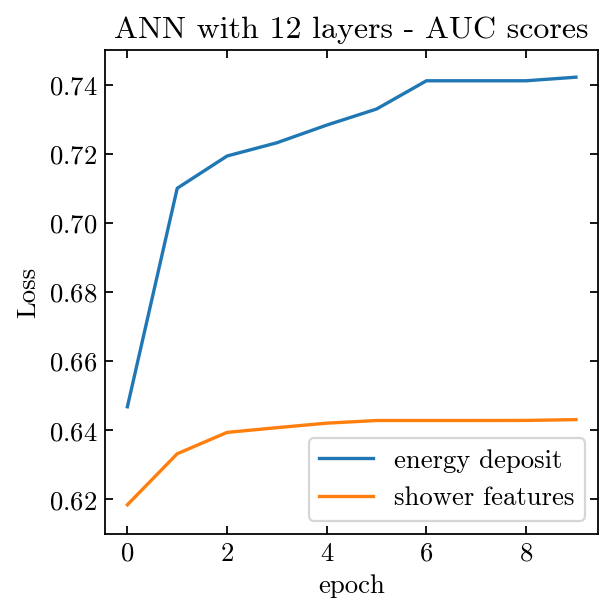

In [61]:
plt.plot(range(len(energy_outputs['12_layers_val_best_auc'])), energy_outputs['12_layers_val_best_auc'], label='energy deposit')
plt.plot(range(len(feature_outputs['12_layers_val_best_auc'])), feature_outputs['12_layers_val_best_auc'], label='shower features')
plt.title('ANN with 12 layers - AUC scores')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('AUC score')
plt.ylim(0.61, 0.75)

plt.tight_layout()
plt.show()

This plot of AUC scores tells us that the model trained on energy deposit classified the particles better than that trained on shower features, meaning that energy deposit is more suitable dataset for training ANN model to classify particles. 

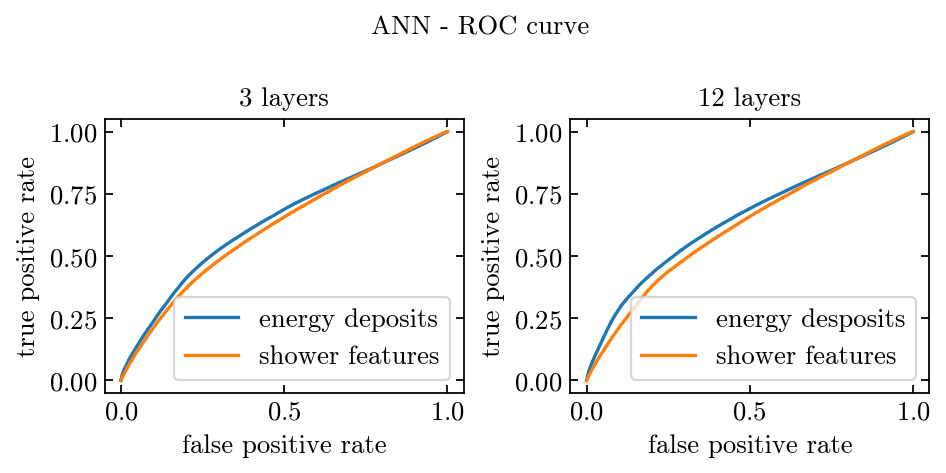

In [34]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(energy_outputs['val_fpr'], energy_outputs['val_tpr'], label='energy deposits')
plt.plot(feature_outputs['val_fpr'], feature_outputs['val_tpr'], label='shower features')
plt.title('3 layers', fontsize=12)
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.subplot(1, 2, 2)
plt.plot(energy_outputs['12_layers_val_fpr'], energy_outputs['12_layers_val_tpr'], label='energy desposits')
plt.plot(feature_outputs['12_layers_val_fpr'], feature_outputs['12_layers_val_tpr'], label='shower features')
plt.title('12 layers', fontsize=12)
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.suptitle('ANN - ROC curve', fontsize=12)
plt.tight_layout()
plt.show()

ROC curve is used for a binary classification and takes false positive rate (FPR) and true positive rate (TPR) in x and y axises respectively. It represents how powerful the model is. AUC score (will be discussed later) is the area under the ROC curves. 

<a id="CNN"></a>

## CNN

Having the results from ANN, we know that energy deposit is more suitable for the model to train on as it produced better results than the model trained on shower features. 

Therefore, we trained on CNN only on energy deposit, but conducted another experiment:
1. How does the number of layers affect on the CNN performance?
2. Does ResNet (CNN with residual blocks) improve the accuracy? 

Let's make sure the results one by one!

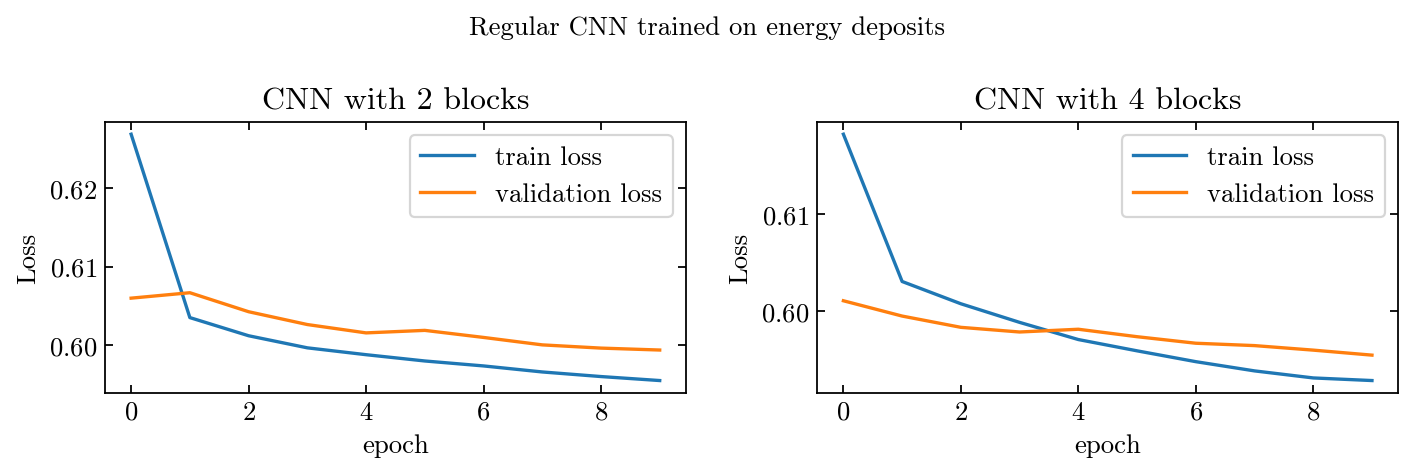

In [14]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(cnn_energy_outputs['train_loss'])), cnn_energy_outputs['train_loss'], label='train loss')
plt.plot(range(len(cnn_energy_outputs['val_loss'])), cnn_energy_outputs['val_loss'], label='validation loss')
plt.title('CNN with 2 blocks')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
# plt.ylim(0.575, 0.655)

plt.subplot(1, 2, 2)
plt.plot(range(len(cnn_energy_outputs['4_layers_train_loss'])), cnn_energy_outputs['4_layers_train_loss'], label='train loss')
plt.plot(range(len(cnn_energy_outputs['4_layers_val_loss'])), cnn_energy_outputs['4_layers_val_loss'], label='validation loss')
plt.title('CNN with 4 blocks')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')

plt.suptitle('Regular CNN trained on energy deposits', fontsize=12)
plt.tight_layout()
plt.show()

The very first thing to do after training a model is...to check if it was overfitting or underfitting. Similar to ANN, we plotted train loss and validation loss. The plots above show no trend of overfitting/underfitting.

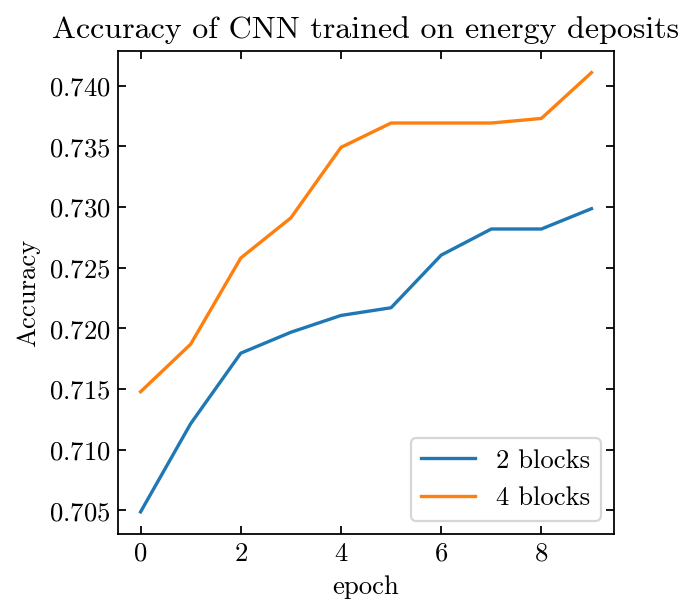

In [15]:
plt.plot(range(len(cnn_energy_outputs['val_best_auc'])), cnn_energy_outputs['val_best_auc'], label='2 blocks')
plt.plot(range(len(cnn_energy_outputs['4_layers_val_best_auc'])), cnn_energy_outputs['4_layers_val_best_auc'], label='4 blocks')
plt.title('Accuracy of CNN trained on energy deposits')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

The accuracy plot clearly illustrates that CNN with 4 blocks (with 8 convolutional layers) achieved higher accuracy than that with 2 blocks (with 4 convolutional layers). From this plot, it is plausible to say the greater number of layers improves the model performance...(:thinkingface) (Please refer to appendix 1 - overfitting and underfitting for the detail)

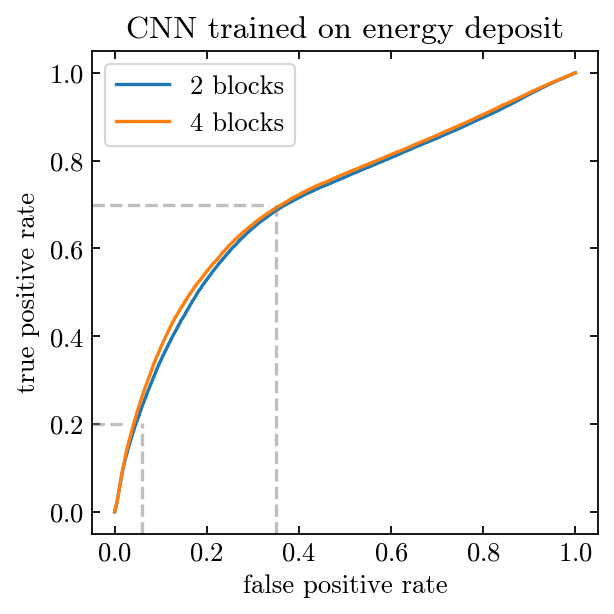

In [16]:
plt.plot(cnn_energy_outputs['val_fpr'], cnn_energy_outputs['val_tpr'], label='2 blocks')
plt.plot(cnn_energy_outputs['4_layers_val_fpr'], cnn_energy_outputs['4_layers_val_tpr'], label='4 blocks')
plt.title('CNN trained on energy deposit')
plt.legend()

plt.axvline(0.06, ymax=0.23, color='gray', ls='--', alpha=0.5)## vertical line
plt.axvline(0.35, ymax=0.68, color='gray', ls='--', alpha=0.5)## vertical line
plt.axhline(0.7, xmax=0.35, color='gray', ls='--', alpha=0.5)## horizontal line
plt.axhline(0.2, xmax=0.06, color='gray', ls='--', alpha=0.5)## horizontal line

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

plt.tight_layout()
plt.show()

<a id="ResNet"></a>

# ResNet

While CNN is a powerful architechture that learns features from whole images, it has a risk of **vanishing gradient**. ResNet was proposed to overcome the rick by skipping a layer. It enabled us to construct much deeper architecture without any fear of vanishing gradient. For more detail, please refer to this video as I found this video helpful while I was learning too (https://youtu.be/Uuc1wdqMFtQ) ! 



### 3 Blocks

In [5]:
# load model

PATH = '../EGamma/saves/cnn_saved_at_20_resblocks_3.pth'
ckpt_3 = torch.load(PATH, map_location=torch.device('cpu'))

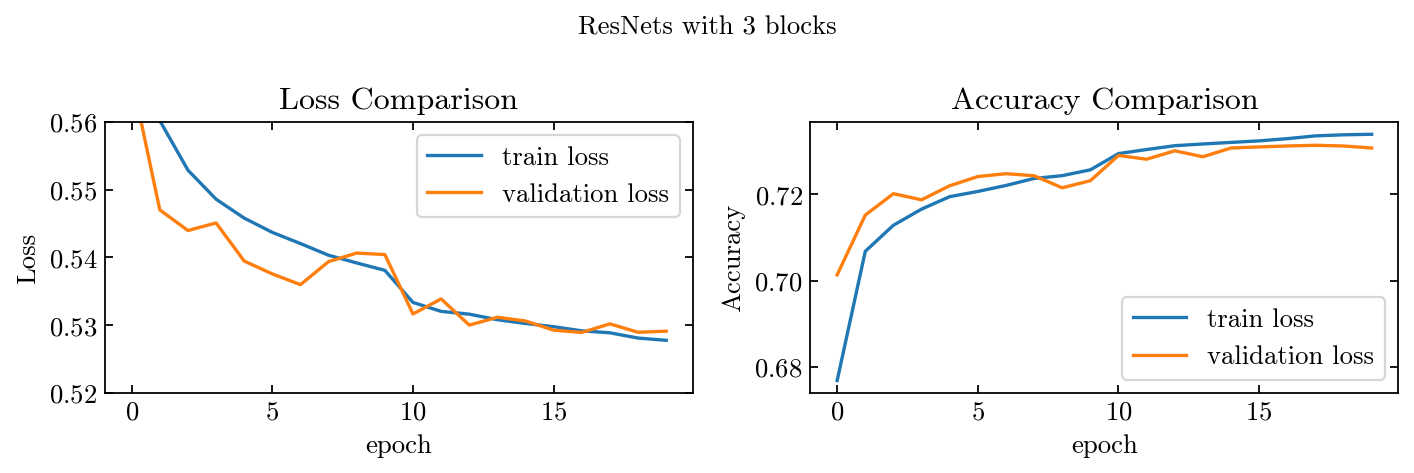

In [6]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(ckpt_3['train_loss'])), ckpt_3['train_loss'], label='train loss')
plt.plot(range(len(ckpt_3['val_loss'])), ckpt_3['val_loss'], label='validation loss')
plt.title('Loss Comparison')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.ylim(0.52, 0.56)

plt.subplot(1, 2, 2)
plt.plot(range(len(ckpt_3['train_acc'])), ckpt_3['train_acc'], label='train loss')
plt.plot(range(len(ckpt_3['val_acc'])), ckpt_3['val_acc'], label='validation loss')
plt.title('Accuracy Comparison')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.suptitle('ResNets with 3 blocks', fontsize=12)
plt.tight_layout()
plt.show()

Let's first check if the model is overfitted/underfitted by plotting the loss. 
Both loss and accuracy plot look exactly what we expect, and this model is confirmed to be a "good fit". 

### 5 blocks

In [9]:
# load model

PATH = '../EGamma/saves/cnn_saved_at_20_resblocks_5.pth'
ckpt_5 = torch.load(PATH, map_location=torch.device('cpu'))

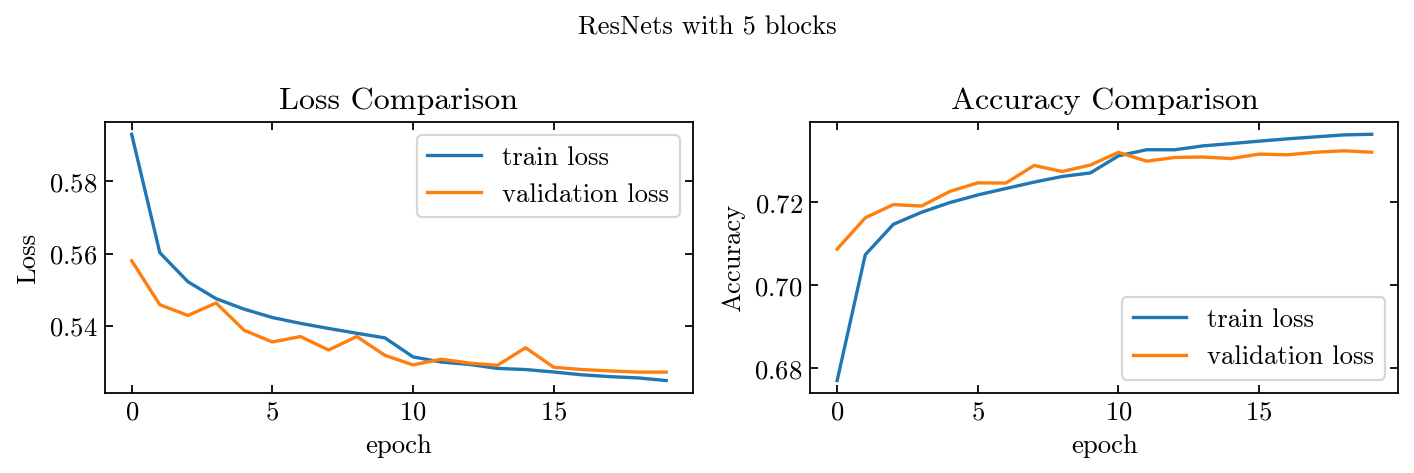

In [10]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(ckpt_5['train_loss'])), ckpt_5['train_loss'], label='train loss')
plt.plot(range(len(ckpt_5['val_loss'])), ckpt_5['val_loss'], label='validation loss')
plt.title('Loss Comparison')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')
# plt.ylim(0.575, 0.655)

plt.subplot(1, 2, 2)
plt.plot(range(len(ckpt_5['train_acc'])), ckpt_5['train_acc'], label='train loss')
plt.plot(range(len(ckpt_5['val_acc'])), ckpt_5['val_acc'], label='validation loss')
plt.title('Accuracy Comparison')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.suptitle('ResNets with 5 blocks', fontsize=12)
plt.tight_layout()
plt.show()

Similarly, we plot the loss and accuracy to make sure the model is "good fit".

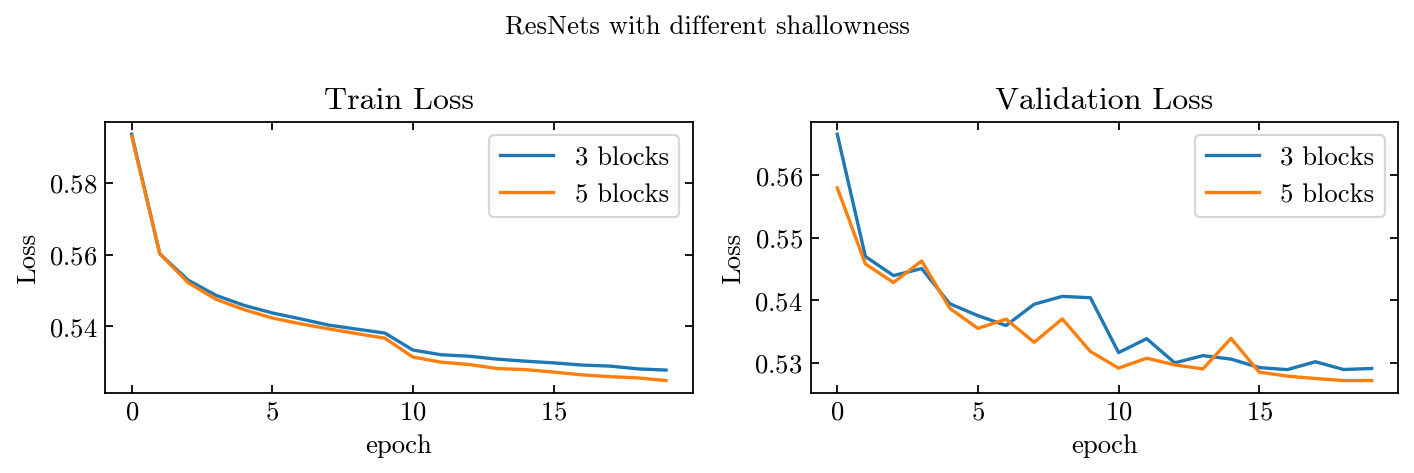

In [13]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(ckpt_3['train_loss'])), ckpt_3['train_loss'], label='3 blocks')
plt.plot(range(len(ckpt_5['train_loss'])), ckpt_5['train_loss'], label='5 blocks')
plt.title('Train Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(ckpt_3['val_loss'])), ckpt_3['val_loss'], label='3 blocks')
plt.plot(range(len(ckpt_5['val_loss'])), ckpt_5['val_loss'], label='5 blocks')
plt.title('Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle('ResNets with different shallowness', fontsize=12)
plt.tight_layout()
plt.show()

While the depth of ResNet in this case did not make huge differences compared to what we have observed in ANN and CNN, we can see that ResNet with 5 blocks has slightly lower loss in training and validation. It indicates that Resnet with 5 blocks efficiently learned the complexity of data faster than 3 blocks. 

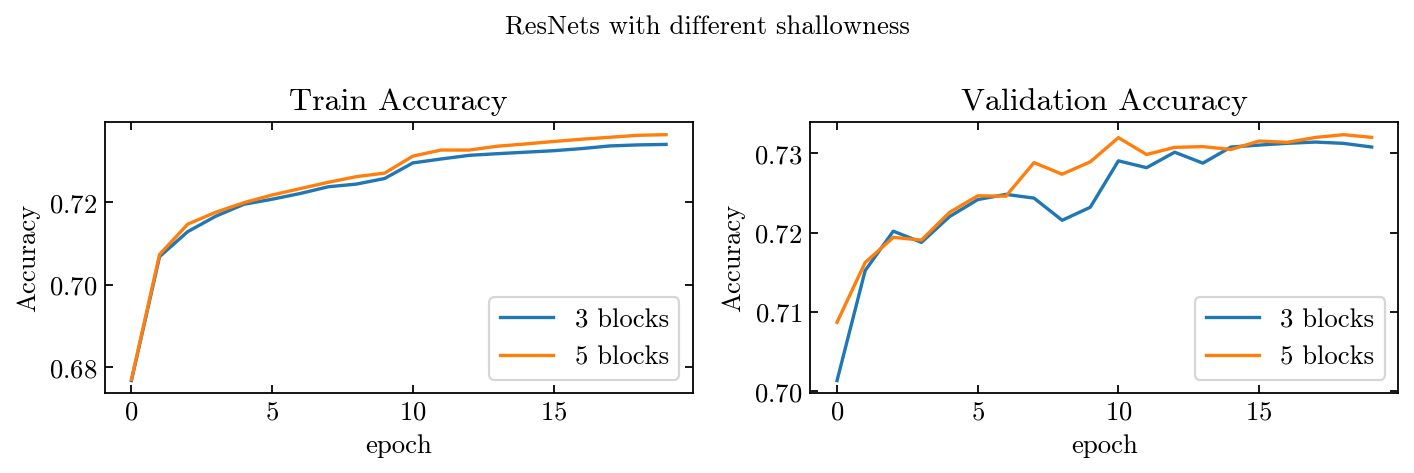

In [14]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(ckpt_3['train_acc'])), ckpt_3['train_acc'], label='3 blocks')
plt.plot(range(len(ckpt_5['train_acc'])), ckpt_5['train_acc'], label='5 blocks')
plt.title('Train Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(ckpt_3['val_acc'])), ckpt_3['val_acc'], label='3 blocks')
plt.plot(range(len(ckpt_5['val_acc'])), ckpt_5['val_acc'], label='5 blocks')
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle('ResNets with different shallowness', fontsize=12)
plt.tight_layout()
plt.show()

In addition to loss plots, we also can verify that ResNet with 5 blocks yielded higher accuracy in training and validation. While they are very substle change, few percent of accuracy increment could be a huge improvement in some context (not in particle physics but self-driving car!). 

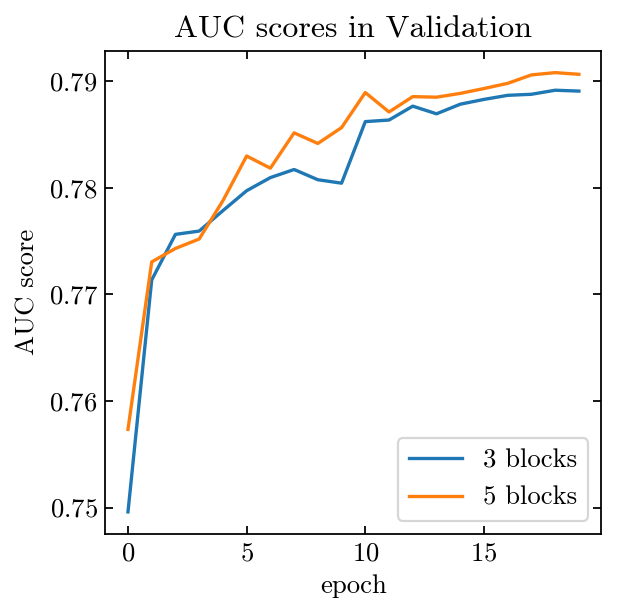

--------------------------------------------------
The best AUC score for 3 blocks is 0.789
The best AUC score for 5 blocks is 0.791
--------------------------------------------------


In [17]:
plt.plot(range(len(ckpt_3['val_auc'])), ckpt_3['val_auc'], label='3 blocks')
plt.plot(range(len(ckpt_5['val_auc'])), ckpt_5['val_auc'], label='5 blocks')
plt.title('AUC scores in Validation')
plt.xlabel('epoch')
plt.ylabel('AUC score')
plt.legend()
plt.show()

print('-'*50)
print('The best AUC score for 3 blocks is {:.3f}'.format(max(ckpt_3['val_auc'])))
print('The best AUC score for 5 blocks is {:.3f}'.format(max(ckpt_5['val_auc'])))
print('-'*50)

### AUC scores 

In [21]:
import pandas as pd

In [22]:
auc_scores = {'Energy': {'ANN' : max(energy_outputs['12_layers_val_best_auc']),
                        'CNN':  max(cnn_energy_outputs['4_layers_val_best_auc']),
                        'ResNet': max(ckpt_5['val_auc'])},
             'Feature': {'ANN': max(feature_outputs['12_layers_val_best_auc'])}}

In [23]:
df = pd.DataFrame.from_dict(auc_scores)
df.round(3)

,Energy,Feature
ANN,0.742,0.643
CNN,0.741,NaN
ResNet,0.791,NaN


The dataframe of AUC above illustrates the two essential elements:

1. The differences between energy deposits of photons and electrons are much more significant than those between shower features of photons and electrons for neural network architectures.
    - Recalling histograms shown in the first notebook, we observed the change in direction of electrons to the phi axis in ECAL due to experiencing the magnetic field from the z-axis and the energy difference in electrons and photons. While both histograms showed some gaps between photons and electrons, the model found the energy differences were more significant based on the AUC scores of ANN trained on energy deposits and shower features.

2. ResNet is the most powerful architecture among the three models, having 0.791 AUC score.
    - Given the fact that the models trained on energy deposits worked well, we applied it to CNN and ResNets and compared the results. Based on the AUC scores, we have a clear conclusion that ResNet is the most powerful architecture among the three. While ANN and CNN have very similar AUC values, it is often known that ANN classifies images poorer than CNN. It is because ANN flattens the images and tries to learn the images pixel by pixel while CNN scans the entire image and tries to learn the features without flattening. We would expect to see a slightly higher AUC score for CNN if we construct it deeper.


<a id="Concolusion"></a>

---

# Conclusion

The series of the notebooks has covered

1. Electromagnetic Calorimeter (ECAL)
2. Deep learning and how to build the networks
3. Apply the networks to a classification problem between electrons and photons from a given data

Our main objective of this notebook was to classify particles using deep learning. We have implemented and compared the results of ANN (Artificial Neural Networks), CNN (Convolutional Neural Networks), and ResNet(Residual Neural Networks). Utilizing the two networks, we have observed the followings:

1. The data of energy deposit is a more suitable dataset for training a model.
2. Training on energy deposit, Resnet yielded the best scores of AUC scores.
3. Changing the number of layers (depth of network) affects the accuracy and AUC scores of a model

We can discuss the results and conclude that
1. The differences in energy deposit between electrons and photons were much more significant for the models to learn than those of shower features, which led the model to have higher accuracies and AUC scores. Please recall that electrons have negative charges while photons are electrically neutral. Therefore, when they experience magnetic fields, photons preserve their energy while electrons lose some energy and are bent to the direction that is perpendicular to the magnetic field. Thus, electrons enter ECAL at a certain angle, which also leads to energy loss. Therefore, the electrons lose energy when **(1) experiencing magnetic fields** and **(2) entering ECAL with an angle while photons do not lose energy**. To sum up the results of our experiments and physics point of view, these differences in energy loss between electrons and photons were more substantial data rather than the electromagnetic shower features.


2. Of all configurations, ANN had the worst accuracy on energy deposits compared to CNN and ResNet. The dataset of energy deposit is an image dataset. ANN, in contrast to CNN and ResNet, requires the entire images to be flattened and for scanning pixel by pixel. While ANN still works for image classifications, it also fails to extract the global features (grasp the entire image, instead of going over each pixel), which is less effective for image classification. Based on our experiments, ResNet yielded the best scores among the three (best AUC: write here). ResNet is known for "short cut" as it skips a layer (for more details on ResNet, watch this video on youtube: https://youtu.be/Uuc1wdqMFtQ). ResNet is generally more powerful than CNN because it lets us train deeper with small loss, and we have also seen that our ResNet worked better than CNN.


3. Determining the optimal depth of networks is essential to avoid overfitting/underfitting and wasting resources such as GPU and memories (Training too many epochs sometimes will not improve the accuracy of the model, leading to wasting resources.)


I hope this series of introduction to deep learning for particle physics  gives you a gentle path to the journy of particle physics and deep learning. 

<a id="Appendix"></a>
<a id="Appendix1"></a>

# Appendix

## 1. Overfitting and Underfitting

For simplicity, I excluded "failed" training as they were either overfitted or underfitted. In this section, I would like to show what the loss plots of overfitting and underfitting look like and how to avoid them by referring to some failed examples.  

---

**Overfitting during ResNet**

Overfitting is when a model learns too much detail about a given training set (See the figure below). The overfitted model fails to generalize the model so that it also classifies better on validation/test sets. 

<img src="./images/underfitting_overfitting.png" alt="https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/" width=48% style="float:right">


I have encountered overfitting during the training of ResNet. 
Shown in the left plot the gap between train loss and validation loss started separating from 10 epochs. 
This separation, such that when validation loss is greater than the train loss, indicates overfitting. 
Let's convert the left figure into words - As the training proceeded, the model attempted to minimize the gap between the original distribution and the predicted distribution, so the train loss lowered. As the train loss decreases, the model should learn the complexitiy of the data, so the validation loss should also drop. However, it does not. That is, the model learned too much detail of the training set and is a lack of generalization. 

Let's also look at the right figure. It is a plot of accuracies of training and validation. 
We can also see that the model fails to improve the validation accuracy at 10th epoch while the accuracy of training increases as the training proceeds. 

<img src="./images/overfitting_resnet.png" alt="overfitted resnet" width=80% style="float:left">

While there are various methods available to avoid overfitting, I utilized **drop out** in our ResNet. Pytorch has a function for dropout `nn.Dropout(p=0.5)`. Dropout randomly removes nodes with a probability of `p` and is considered to be a kind of regularization. The default dropout rate is `p=0.5`, but Park. S and Kwak. N (2016) found that `p=0.1 - 0.2` is the most effective dropout rate for CNN. As ResNet is an extension of CNN, I have implemented `p=0.25` to ResNet model. 

**Underfitting during ANN**

In contrast to overfitting, underfitting is when a model does not learn any complexity of a given data. Unlike the overfitted model, it is sometimes challenging to identify the issue. One strategy to diagnose underfitting is to plot accuracy and loss. As shown in the left figure, the train loss and validation loss are both decreasing, which is expected. Although the model should have higher accuracies as the training proceeds, the right plot of train and validation accuracy is very flat. These two figures exemplify underfitting, the model does not learn the details of the data, resulting in flat accuracies. 

<img src="./images/underfitting_ann.png" alt="underfitted ANN" width=80% style="float:left">

Underfitting is observed when a model is shallow. In this case, the underfitting only occurred once, and I did not encounter it after re-training three times, so I assume it was a random case. However, if you find underfitting multiple times, I recommend increasing the number of layers and/or training longer. This will give the model more time to learn the complexity of the data. 

---

<a id="Appendix2"></a>

## 2. Energy Loss of Particles

We focus on the energy loss of electrons and photons as it was discussed in the series of notebooks.
There are limited conditions when particles lose their energy: three effects for photons, and two interactions for electrons in a detector. 

While the knowledge of energy loss is not directly related to this entire project, it is helpful to understand the energy loss of particles for general physics knowledge. Here, we will only cover an overview of them, so please feel free to search more on yourself. 


**Photon ( $\gamma$ )**

A very important understanding of energy loss of photon is - **Photon does not lose any energy unless it collides with another particle**

There are three effects when photons interact with other particles:
1. Photoelectic Effect
2. Compton Effect
3. Pair Production

While all effects are important, Photoelectric Effect and Compton Effect are negligible for high energy physics. Shown in the figure below, in high energy such that $10^9$ (eV) $= 1$ (GeV)  of photon energy, the most dominant interaction of photon is a pair-production. On the other hand, in lower energy situation, photoelectric effect and Compton effect are dominant. As the series focus on high energy physics, I would like to go through the overview of pair production below. 

<img src="./images/Photon-energy-dependent-cross-sections-Cross-sections-of-the-photoelectric-absorption.png" 
alt="Electronic and magnetic properties of hybrid interfaces. From single molecules to ultrathin molecular films on metallic substrates." width=40% style="float:center">
img credit: DOI: 10.5445/IR/1000045289 Veröffentlicht am 01.06.2015 

**Pair Production**

Pair Production is a phenomenon when a boson collides with a nucleus and the nucleus gives subatomic particle and the antisubatomic particle pair. One example is when a photon collides an nucleus and electron-positron pair is produced. This is one process of the electromagnetic shower. 

To create electron-positron pair ($e^-$$e^+$ pair), the photon must have a minimum energy of 
$2m_0c^2$ as each $e^-$ and $e^+$ has the energy of $m_0c^2$. If the photon exceeds the threshold energy, the excessive energy is used for the motion of $e^-$ and $e^+$. 
<img src="./images/pair_production.png" alt="https://phys.libretexts.org/Bookshelves/Modern_Physics/Book%3A_Spiral_Modern_Physics_(D'Alessandris)/4%3A_The_Photon/4.3%3A_Pair_Production" width=30% style="float:center">


In an extreame case where a magnetic field is uniformaly applied and the photon has $4m_0c^2$ such as in a detector, the photon disappears and $e^-$ and $e^+$ recoil and move in circurate tragectory (shown in the figure below). The circuler motion is getting smaller and smaller because each particle loses their energies, leading to having the smaller diameter of motion. 

<img src="./images/pair-production-recoilision.png" alt="Electromagnetic Showers and Shower Detectors, Venkatesh S. Kaushik, 2002" width=50% style="float:center">


**Electron ($e^-$)**

Electrons are negatively charged particles that presumably everyone has heard of. 
While they are one of the most fundamental particles, it plays an important role in CMS. 

I want to briefly explain Bremsstrahlung, a radiation of a charged particles, which is very commonly happened in CMS. 


**Bremsstrahlung**

Bremsstrahlung is a radiation when a charged particle interacts with a medium such as nuclius and emits radiation when they are decelerated or accelerated. It is very similar to pair production of photon, but Bremsstrahlung is for a charged particle. 

Taking an example of electrons, when they interact with a nucleus, they emit electron and photon shown in the figure below. Moreover, another example is electron's change in direction when electrons experience magnetic field. We have observed in a histogram in part 1 that how electrons are bended by magnetic field while photons are not. It was exactly one of examples of Bresstrahlung. In addition to this, it is also Bremsstrahlung when electrons enter ECAL with an angle. In this way, Bremsstrahlung is ubiquitous in CMS experiments. 

Let's go deeper Bremsstrahlung specifically when electrons are bended by magnetic field. 

The interaction between an electron and magnetic field creates a magnetic force that is proportional to the amount of charge, and it is represented as $\vec{F}_{magnetic} = q(v \otimes \vec{B})$. Because of the outer product, you might have notice that the force created by the electron and the magnetic field points out to a direction that is perpendicular to the magnetic field. And yes, you are right. To be more concreate, in a detector, the magnetic field is applied to z direction, thus the electron moves toward $\phi$ direction.

The change in direction of electrons due to magnetic field is observable as one of features we used in our training. In part 1 notebook, we created histogram of shower features, and phiWidth and etaWidth are the data of which direction particles move (Shown the two histograms below).In phiWidth, the count of lower energy scaled of electron is less than that of photons due to energy loss when entering to ECAL with an angle after electrons are bended by magnetic field. 



phiWidth | etaWidth
:-: | :-: 
![phiWidth](./images/hist/phiWidth.png) | ![etaWidth](./images/hist/etaWidth.png)

<a id="Acknowledgements"></a>

# Acknowledgments

This notebook was created for an extension of Kyungmin Park's work (https://github.com/kyungminparkdrums/EGamma.git). 
Also, the entire project was directed by my mentor Michael Andrew and my advisor, Professor Manfred Paulini. 
I would like to express my gratitude to all of them. 